**Import necessary libraries**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

Load the dataset

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

There are total of 18 attributes: HeartDisease ,BMI, Smoking ,AlcoholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease, SkinCancer.

**info()** For a quick descrition of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319789 non-null  float64
 2   Smoking           319721 non-null  object 
 3   AlcoholDrinking   319680 non-null  object 
 4   Stroke            319774 non-null  object 
 5   PhysicalHealth    319778 non-null  float64
 6   MentalHealth      319781 non-null  float64
 7   DiffWalking       319762 non-null  object 
 8   Sex               319482 non-null  object 
 9   AgeCategory       319751 non-null  object 
 10  Race              319756 non-null  object 
 11  Diabetic          319762 non-null  object 
 12  PhysicalActivity  319779 non-null  object 
 13  GenHealth         319302 non-null  object 
 14  SleepTime         319576 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Using **describe()** method for numerical  

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319789.000000,319778.000000,319781.000000,319576.000000
mean,28.325348,3.371605,3.898384,7.096922
std,6.356134,7.950662,7.955291,1.436165
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Checking missing values

In [7]:
df.isna().sum()/len(df)*100

HeartDisease        0.000000
BMI                 0.001876
Smoking             0.023140
AlcoholDrinking     0.035961
Stroke              0.006567
PhysicalHealth      0.005316
MentalHealth        0.004378
DiffWalking         0.010319
Sex                 0.097875
AgeCategory         0.013759
Race                0.012195
Diabetic            0.010319
PhysicalActivity    0.005003
GenHealth           0.154161
SleepTime           0.068481
Asthma              0.000000
KidneyDisease       0.005316
SkinCancer          0.000000
dtype: float64

In [8]:
categorical_attr=['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking',
                 'Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease']

In [9]:
def valueCount(column):
    print(f'{column}:\n{df[column].value_counts(normalize=True)}')
    
for count in categorical_attr:
    valueCount(count)

HeartDisease:
No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64
Smoking:
No     0.587522
Yes    0.412478
Name: Smoking, dtype: float64
AlcoholDrinking:
No     0.931894
Yes    0.068106
Name: AlcoholDrinking, dtype: float64
Stroke:
No     0.962261
Yes    0.037739
Name: Stroke, dtype: float64
DiffWalking:
No     0.86115
Yes    0.13885
Name: DiffWalking, dtype: float64
Sex:
Female    0.524571
Male      0.475429
Name: Sex, dtype: float64
AgeCategory:
65-69          0.106780
60-64          0.105335
70-74          0.097138
55-59          0.093060
50-54          0.079374
80 or older    0.075509
45-49          0.068147
75-79          0.067159
18-24          0.065870
40-44          0.065695
35-39          0.064263
30-34          0.058646
25-29          0.053026
Name: AgeCategory, dtype: float64
Race:
White                             0.766800
Hispanic                          0.085834
Black                             0.071689
Other                             0.034176
Asian    

In [10]:
def uniqueAttrs(column):
    return df[column].unique()

for count in categorical_attr:
    print(f'{count}:{uniqueAttrs(count)}\n')

HeartDisease:['No' 'Yes']

Smoking:['Yes' 'No' nan]

AlcoholDrinking:['No' 'Yes' nan]

Stroke:['No' 'Yes' nan]

DiffWalking:['No' 'Yes' nan]

Sex:['Female' 'Male' nan]

AgeCategory:['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29' nan]

Race:['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic' nan]

Diabetic:['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)' nan]

PhysicalActivity:['Yes' 'No' nan]

GenHealth:['Very good' 'Fair' 'Good' 'Poor' 'Excellent' nan]

Asthma:['Yes' 'No']

KidneyDisease:['No' nan 'Yes']



In [11]:
df1 = df.copy()

In [12]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


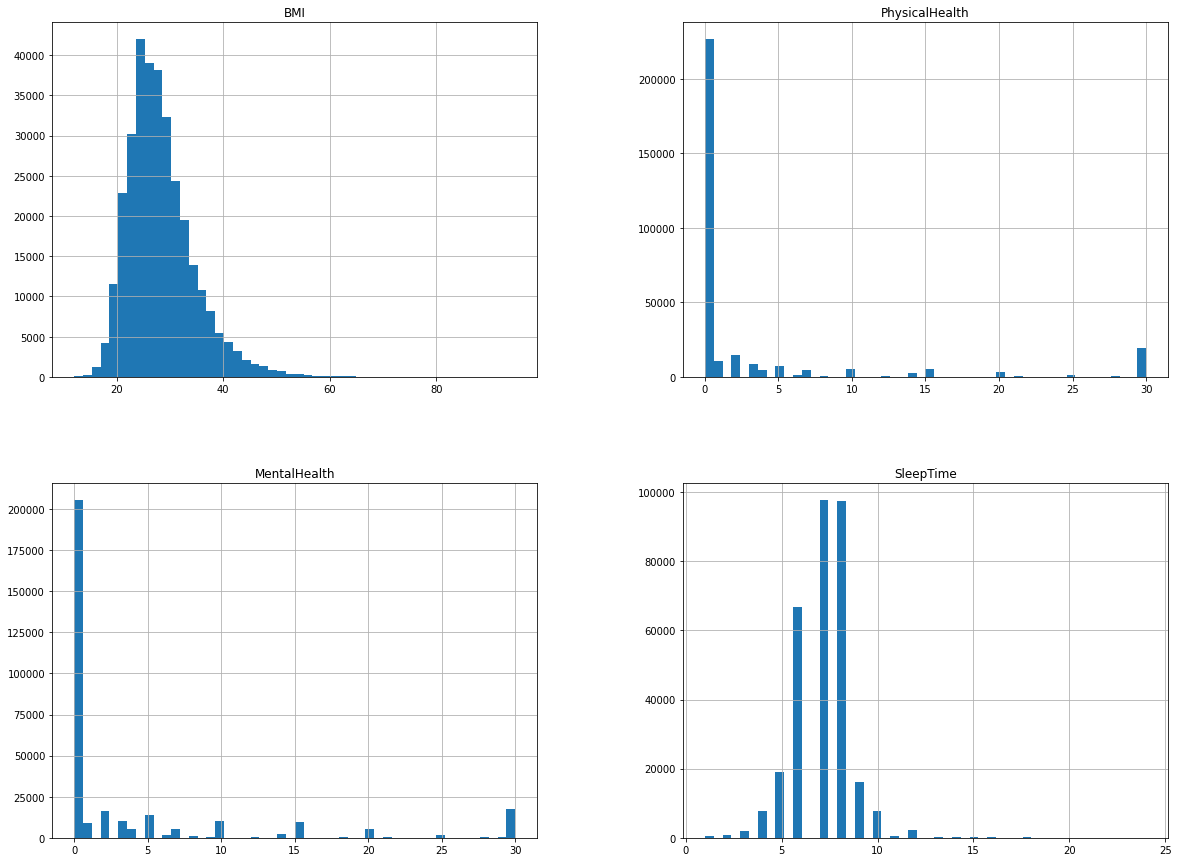

In [13]:
df1.hist(bins=50, figsize=(20,15))
plt.show()

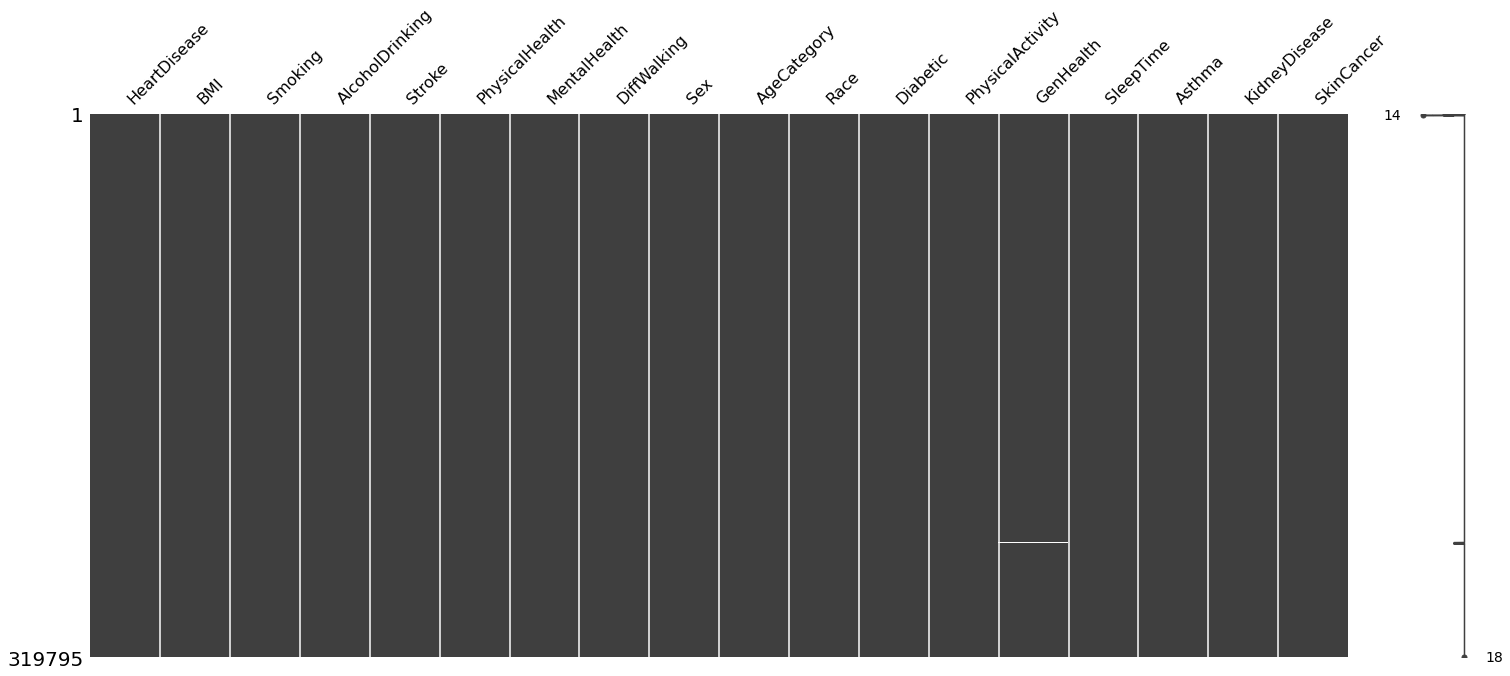

In [14]:
msno.matrix(df1)
plt.show()

In [15]:
df1 = df1.dropna()

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318573 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      318573 non-null  object 
 1   BMI               318573 non-null  float64
 2   Smoking           318573 non-null  object 
 3   AlcoholDrinking   318573 non-null  object 
 4   Stroke            318573 non-null  object 
 5   PhysicalHealth    318573 non-null  float64
 6   MentalHealth      318573 non-null  float64
 7   DiffWalking       318573 non-null  object 
 8   Sex               318573 non-null  object 
 9   AgeCategory       318573 non-null  object 
 10  Race              318573 non-null  object 
 11  Diabetic          318573 non-null  object 
 12  PhysicalActivity  318573 non-null  object 
 13  GenHealth         318573 non-null  object 
 14  SleepTime         318573 non-null  float64
 15  Asthma            318573 non-null  object 
 16  KidneyDisease     31

In [17]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 318573, dtype: bool

In [18]:
df1 = df1.drop_duplicates()

In [19]:
df1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [20]:
def uniqueAttrs(column):
    return df1[column].unique()

for count in categorical_attr:
    print(f'{count}:{uniqueAttrs(count)}\n')

HeartDisease:['No' 'Yes']

Smoking:['Yes' 'No']

AlcoholDrinking:['No' 'Yes']

Stroke:['No' 'Yes']

DiffWalking:['No' 'Yes']

Sex:['Female' 'Male']

AgeCategory:['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '35-39' '30-34' '25-29' '18-24']

Race:['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Hispanic'
 'Other']

Diabetic:['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

PhysicalActivity:['Yes' 'No']

GenHealth:['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

Asthma:['Yes' 'No']

KidneyDisease:['No' 'Yes']



In [21]:
df1 = df1.drop(columns='Race')

In [22]:
df1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,No,No,Good,12.0,No,No,No


In [24]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']])
df1['AgeCategory'] = ordinal_encoder.fit_transform(df1[['AgeCategory']])

In [28]:
df1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7.0,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12.0,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,9.0,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,11.0,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,4.0,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,8.0,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,3.0,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,5.0,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,1.0,No,No,Good,12.0,No,No,No


In [29]:
df1 = df1.replace('No',0)
df1 = df1.replace('Yes',1)

In [31]:
df1.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                  object
AgeCategory         float64
Diabetic             object
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [41]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder()
df1 = binary_encoder.fit_transform(df1, columns= 'GenHealth')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300609 entries, 0 to 319794
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      300609 non-null  int64  
 1   BMI               300609 non-null  float64
 2   Smoking           300609 non-null  int64  
 3   AlcoholDrinking   300609 non-null  int64  
 4   Stroke            300609 non-null  int64  
 5   PhysicalHealth    300609 non-null  float64
 6   MentalHealth      300609 non-null  float64
 7   DiffWalking       300609 non-null  int64  
 8   Sex_0             300609 non-null  int64  
 9   Sex_1             300609 non-null  int64  
 10  AgeCategory       300609 non-null  float64
 11  Diabetic_0        300609 non-null  int64  
 12  Diabetic_1        300609 non-null  int64  
 13  Diabetic_2        300609 non-null  int64  
 14  PhysicalActivity  300609 non-null  int64  
 15  GenHealth_0       300609 non-null  int64  
 16  GenHealth_1       30

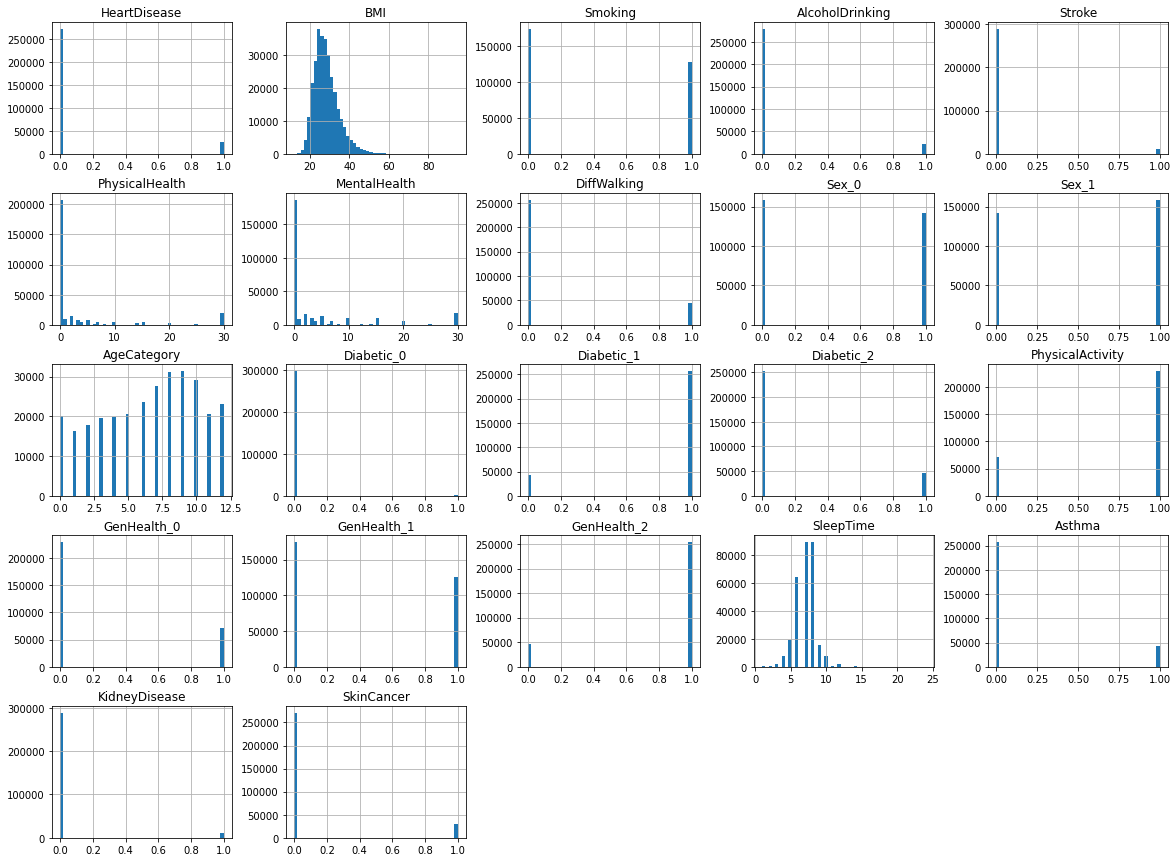

In [48]:
df1.hist(bins=50,figsize=(20,15))
plt.show()

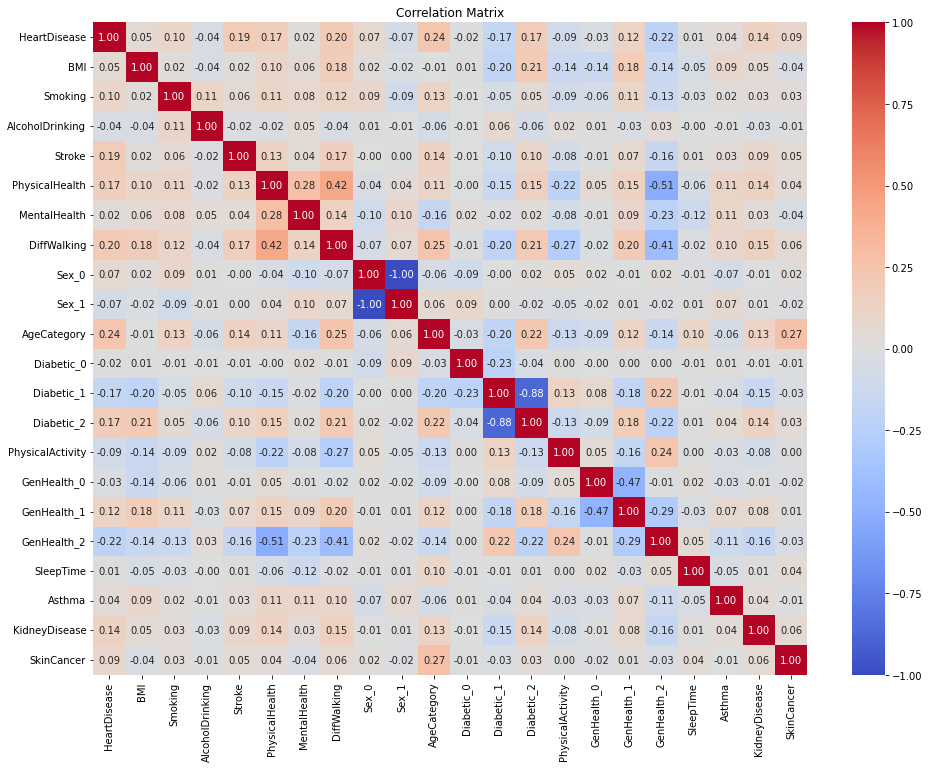

In [77]:
corr_matrix = df1.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [55]:
X = df1.drop('HeartDisease', axis=1)
y = df1['HeartDisease']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (240487, 21)
X_test shape: (60122, 21)
y_train shape: (240487,)
y_test shape: (60122,)


In [63]:
clf = RandomForestClassifier(random_state=42)

In [65]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = clf.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [71]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[53259  1403]
 [ 4782   678]]


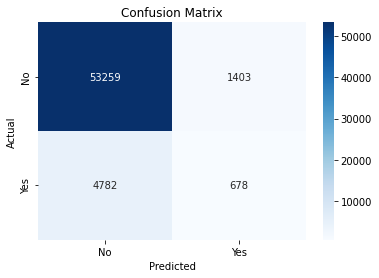

In [72]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [2]:
import joblib
# joblib.dump(clf, "my_model.pkl")

In [3]:
loaded_model = joblib.load('my_model.pkl')

In [4]:
loaded_model

RandomForestClassifier(random_state=42)